In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

from interaction import NonlocalSystem, potential
import constants as const
import utility
import bind

plt.style.use('science')
gr = 4/3
h = 3

In [2]:
HBAR = 1.054572e-34
A0 = 5.291772e-11
ME = 9.109384e-31

In [3]:
const.BETA4

32.70989286766126

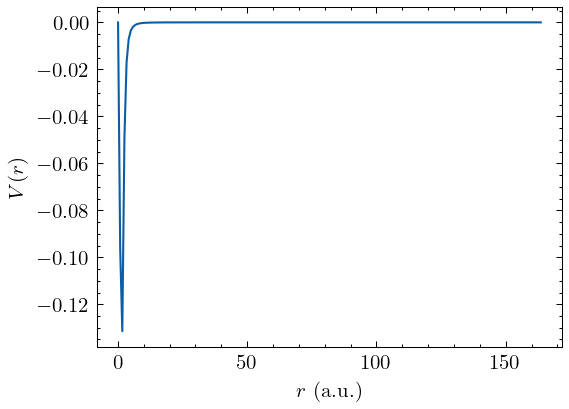

In [4]:
R = 1.25
rs = np.linspace(0.1, 5*const.BETA4, 200)

fig, ax = plt.subplots(figsize=(gr*h, h), dpi=150)
fig.patch.set_facecolor('white')

ax.plot(rs, potential(rs, R))

ax.set_xlabel(r'$r$ (a.u.)')
ax.set_ylabel(r'$V(r)$');

In [5]:
amu = 1.66e-27 # kg
mass = 1.00784 * amu / 1.783e-36 / 1e6

In [6]:
mass / const.MASS_ELECTRON

1836.2352833379457

In [7]:
nls = NonlocalSystem(R, ell=0, nq=300)

In [8]:
nls.bound_state_spectrum(6.2, 0)

array([-2.39330510e-05, -1.04237508e-03, -1.42469233e-02, -9.20482977e-01])

In [9]:
B2_GS = -0.065
B2_ES = -0.001

def f(g, nls):
    return B2_ES - nls.bound_state_spectrum(g, 0)[1]

In [10]:
partial_waves = list(range(7))

In [11]:
class Spectra:
    def __init__(self, R, g):
        self.R = R
        self.g = g
        self.spectrum = NonlocalSystem(R).bound_state_spectrum(self.g, 0)

In [12]:
from scipy.interpolate import interp1d

In [13]:
def interp_from_last_five(x, y, x_new, y_old):
    if len(x) >= 5:
        f = interp1d(x, y, kind='cubic', fill_value='extrapolate')
        return f(x_new)
    else:
        return y_old

In [14]:
R = 1.25
guess = 6.2
spectra = []
Rs = []
gs = []

while R >= 0.5:
    nls = NonlocalSystem(R, ell=0)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.01
        guess = g
    except:
        break

R = 1.25  g = 6.23e+00  guess = 6.20e+00  N = 4  GS = -0.8980
R = 1.24  g = 6.31e+00  guess = 6.23e+00  N = 4  GS = -0.9030
R = 1.23  g = 6.40e+00  guess = 6.31e+00  N = 4  GS = -0.9076
R = 1.22  g = 6.49e+00  guess = 6.40e+00  N = 4  GS = -0.9118
R = 1.21  g = 6.57e+00  guess = 6.49e+00  N = 4  GS = -0.9152
R = 1.20  g = 6.66e+00  guess = 6.57e+00  N = 4  GS = -0.9177
R = 1.19  g = 6.76e+00  guess = 6.66e+00  N = 4  GS = -0.9188
R = 1.18  g = 6.85e+00  guess = 6.76e+00  N = 4  GS = -0.9181
R = 1.17  g = 6.95e+00  guess = 6.85e+00  N = 4  GS = -0.9152
R = 1.16  g = 7.06e+00  guess = 6.95e+00  N = 4  GS = -0.9094
R = 1.15  g = 7.16e+00  guess = 7.06e+00  N = 4  GS = -0.9000
R = 1.14  g = 7.28e+00  guess = 7.16e+00  N = 4  GS = -0.8860
R = 1.13  g = 7.40e+00  guess = 7.28e+00  N = 4  GS = -0.8663
R = 1.12  g = 7.53e+00  guess = 7.40e+00  N = 4  GS = -0.8392
R = 1.11  g = 7.67e+00  guess = 7.53e+00  N = 4  GS = -0.8028
R = 1.10  g = 7.82e+00  guess = 7.67e+00  N = 4  GS = -0.7549
R = 1.09

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


R = 0.99  g = 9.35e+06  guess = 2.23e+01  N = 4  GS = -0.1090
R = 0.98  g = 9.42e+06  guess = 9.35e+06  N = 4  GS = -0.1136
R = 0.97  g = 1.08e+07  guess = 9.42e+06  N = 4  GS = -0.1184
R = 0.96  g = 1.10e+07  guess = 1.08e+07  N = 4  GS = -0.1235
R = 0.95  g = 1.11e+07  guess = 1.10e+07  N = 4  GS = -0.1289
R = 0.94  g = 1.11e+07  guess = 1.11e+07  N = 4  GS = -0.1346


In [15]:
R = 0.99
nls = NonlocalSystem(R)

In [17]:
guess = 0
nls.bound_state_spectrum(guess, 0)

array([-2.32204697e-05, -9.47898648e-04, -8.93670798e-03, -9.56633161e-02,
       -1.40237486e+01])

In [18]:
while R >= 0.5:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.01
        guess = g
    except:
        break

R = 0.99  g = -1.81e+01  guess = 0.00e+00  N = 5  GS = -41.1732
R = 0.98  g = 1.13e+00  guess = -1.81e+01  N = 5  GS = -12.8623
R = 0.97  g = 4.13e+00  guess = 1.13e+00  N = 5  GS = -8.6334
R = 0.96  g = 5.41e+00  guess = 4.13e+00  N = 5  GS = -6.9767
R = 0.95  g = 6.15e+00  guess = 5.41e+00  N = 5  GS = -6.1233
R = 0.94  g = 6.65e+00  guess = 6.15e+00  N = 5  GS = -5.6246
R = 0.93  g = 7.03e+00  guess = 6.65e+00  N = 5  GS = -5.3143
R = 0.92  g = 7.34e+00  guess = 7.03e+00  N = 5  GS = -5.1166
R = 0.91  g = 7.61e+00  guess = 7.34e+00  N = 5  GS = -4.9917
R = 0.90  g = 7.85e+00  guess = 7.61e+00  N = 5  GS = -4.9166
R = 0.89  g = 8.07e+00  guess = 7.85e+00  N = 5  GS = -4.8772
R = 0.88  g = 8.27e+00  guess = 8.07e+00  N = 5  GS = -4.8637
R = 0.87  g = 8.47e+00  guess = 8.27e+00  N = 5  GS = -4.8693
R = 0.86  g = 8.66e+00  guess = 8.47e+00  N = 5  GS = -4.8887
R = 0.85  g = 8.85e+00  guess = 8.66e+00  N = 5  GS = -4.9174
R = 0.84  g = 9.04e+00  guess = 8.85e+00  N = 5  GS = -4.9510
R = 

In [19]:
R = 0.69
nls = NonlocalSystem(R)

In [20]:
guess = 0
nls.bound_state_spectrum(guess, 0)

array([-2.96062351e-05, -9.93700228e-04, -7.54228338e-03, -4.47706037e-02,
       -4.14695592e-01, -5.94397886e+01])

In [21]:
while R >= 0.5:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.01
        guess = g
    except:
        break

R = 0.69  g = -1.16e+00  guess = 0.00e+00  N = 6  GS = -64.5635
R = 0.68  g = 6.87e+00  guess = -1.16e+00  N = 6  GS = -31.2347
R = 0.67  g = 8.80e+00  guess = 6.87e+00  N = 6  GS = -24.3245
R = 0.66  g = 9.78e+00  guess = 8.80e+00  N = 6  GS = -21.6138
R = 0.65  g = 1.04e+01  guess = 9.78e+00  N = 6  GS = -20.3520
R = 0.64  g = 1.09e+01  guess = 1.04e+01  N = 6  GS = -19.7626
R = 0.63  g = 1.14e+01  guess = 1.09e+01  N = 6  GS = -19.5371
R = 0.62  g = 1.18e+01  guess = 1.14e+01  N = 6  GS = -19.5222
R = 0.61  g = 1.22e+01  guess = 1.18e+01  N = 6  GS = -19.6242
R = 0.60  g = 1.25e+01  guess = 1.22e+01  N = 6  GS = -19.7698
R = 0.59  g = 1.29e+01  guess = 1.25e+01  N = 6  GS = -19.8843
R = 0.58  g = 1.34e+01  guess = 1.29e+01  N = 6  GS = -19.8689
R = 0.57  g = 1.38e+01  guess = 1.34e+01  N = 6  GS = -19.5680
R = 0.56  g = 1.44e+01  guess = 1.38e+01  N = 6  GS = -18.6973
R = 0.55  g = 1.51e+01  guess = 1.44e+01  N = 6  GS = -16.6670
R = 0.54  g = 1.60e+01  guess = 1.51e+01  N = 6  GS =

In [22]:
R = 0.51
nls = NonlocalSystem(R)

In [23]:
guess = 0
nls.bound_state_spectrum(guess, 0)

array([-3.51171442e-05, -1.03895047e-03, -7.04939527e-03, -3.29430288e-02,
       -1.61346974e-01, -1.40303205e+00, -1.99169286e+02])

In [24]:
while R >= 0.25:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.01
        guess = g
    except:
        break

R = 0.51  g = 5.70e+00  guess = 0.00e+00  N = 7  GS = -136.6552
R = 0.50  g = 1.17e+01  guess = 5.70e+00  N = 7  GS = -78.9983
R = 0.49  g = 1.35e+01  guess = 1.17e+01  N = 7  GS = -67.6039
R = 0.48  g = 1.45e+01  guess = 1.35e+01  N = 7  GS = -63.9854
R = 0.47  g = 1.53e+01  guess = 1.45e+01  N = 7  GS = -63.0429
R = 0.46  g = 1.60e+01  guess = 1.53e+01  N = 7  GS = -63.1974
R = 0.45  g = 1.67e+01  guess = 1.60e+01  N = 7  GS = -63.6014
R = 0.44  g = 1.74e+01  guess = 1.67e+01  N = 7  GS = -63.3967
R = 0.43  g = 1.83e+01  guess = 1.74e+01  N = 7  GS = -61.0583
R = 0.42  g = 1.95e+01  guess = 1.83e+01  N = 7  GS = -52.5779
R = 0.41  g = 2.19e+01  guess = 1.95e+01  N = 7  GS = -23.9438
R = 0.40  g = 5.12e+01  guess = 2.19e+01  N = 7  GS = -4.6372
R = 0.39  g = 5.36e+06  guess = 5.12e+01  N = 7  GS = -4.6771
R = 0.38  g = 5.27e+06  guess = 5.36e+06  N = 7  GS = -5.1908
R = 0.37  g = 5.03e+06  guess = 5.27e+06  N = 8  GS = -5.7769
R = 0.36  g = 5.03e+06  guess = 5.03e+06  N = 8  GS = -6.4

KeyboardInterrupt: 

In [52]:
R = 0.38
nls = NonlocalSystem(R)

In [66]:
guess = 17
nls.bound_state_spectrum(guess, 0)

array([-3.84293670e-05, -1.06106989e-03, -6.73613020e-03, -2.75832349e-02,
       -1.01440143e-01, -4.30781909e-01, -3.19509857e+00, -1.96285220e+02])

In [67]:
while R >= 0.1:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.01
        guess = g
    except:
        break

R = 0.38  g = 1.74e+01  guess = 1.70e+01  N = 8  GS = -185.6385
R = 0.37  g = 1.90e+01  guess = 1.74e+01  N = 8  GS = -175.3670
R = 0.36  g = 2.02e+01  guess = 1.90e+01  N = 8  GS = -174.5146
R = 0.35  g = 2.14e+01  guess = 2.02e+01  N = 8  GS = -174.9134
R = 0.34  g = 2.28e+01  guess = 2.14e+01  N = 8  GS = -168.7923
R = 0.33  g = 2.50e+01  guess = 2.28e+01  N = 8  GS = -131.2061
R = 0.32  g = 3.77e+01  guess = 2.50e+01  N = 8  GS = -14.2760


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


R = 0.31  g = 3.95e+06  guess = 3.77e+01  N = 8  GS = -11.7427
R = 0.30  g = 3.56e+06  guess = 3.95e+06  N = 8  GS = -13.3918
R = 0.29  g = 3.92e+06  guess = 3.56e+06  N = 9  GS = -15.3403


In [78]:
R = 0.31
nls = NonlocalSystem(R)

In [85]:
guess = 18
nls.bound_state_spectrum(guess, 0)

array([-3.66564136e-05, -1.03107593e-03, -6.42373653e-03, -2.48956483e-02,
       -8.13592140e-02, -2.68808924e-01, -1.09873839e+00, -8.27604519e+00,
       -5.80858124e+02])

In [86]:
while R >= 0.1:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.2f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.0025
        guess = g
    except:
        break

R = 0.31  g = 1.87e+01  guess = 1.80e+01  N = 9  GS = -544.9037
R = 0.31  g = 2.03e+01  guess = 1.87e+01  N = 9  GS = -492.9752
R = 0.30  g = 2.13e+01  guess = 2.03e+01  N = 9  GS = -464.8502
R = 0.30  g = 2.21e+01  guess = 2.13e+01  N = 9  GS = -448.5445
R = 0.30  g = 2.28e+01  guess = 2.21e+01  N = 9  GS = -438.9286
R = 0.30  g = 2.33e+01  guess = 2.28e+01  N = 9  GS = -433.4110
R = 0.29  g = 2.39e+01  guess = 2.33e+01  N = 9  GS = -430.5078
R = 0.29  g = 2.43e+01  guess = 2.39e+01  N = 9  GS = -429.2674
R = 0.29  g = 2.48e+01  guess = 2.43e+01  N = 9  GS = -429.0025
R = 0.29  g = 2.53e+01  guess = 2.48e+01  N = 9  GS = -429.1440
R = 0.28  g = 2.58e+01  guess = 2.53e+01  N = 9  GS = -429.1447
R = 0.28  g = 2.62e+01  guess = 2.58e+01  N = 9  GS = -428.3935
R = 0.28  g = 2.67e+01  guess = 2.62e+01  N = 9  GS = -426.1148
R = 0.28  g = 2.73e+01  guess = 2.67e+01  N = 9  GS = -421.2139
R = 0.27  g = 2.79e+01  guess = 2.73e+01  N = 9  GS = -412.0028
R = 0.27  g = 2.86e+01  guess = 2.79e+01

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


R = 0.26  g = 2.95e+06  guess = 5.63e+01  N = 9  GS = -24.6961


In [89]:
R = 0.2575
nls = NonlocalSystem(R)

In [90]:
guess = 0
nls.bound_state_spectrum(guess, 0)

array([-3.51845888e-05, -1.00784774e-03, -6.21414099e-03, -2.32956844e-02,
       -7.11105549e-02, -2.06001028e-01, -6.46562247e-01, -2.65306568e+00,
       -2.17786524e+01, -3.06493001e+03])

In [91]:
while R >= 0.1:
    nls = NonlocalSystem(R)
    try:
        result = optimize.fsolve(f, guess, args=(nls), factor=0.1)
        g = result[0]
        spectrum = nls.bound_state_spectrum(g, 0)
        n = spectrum.size
        print(f'R = {R:.6f}  g = {g:.2e}  guess = {guess:.2e}  N = {n}  GS = {spectrum[-1]:.4f}')
        spectra.append(spectrum)
        Rs.append(R)
        gs.append(g)
        R -= 0.001
        guess = g
    except:
        break

R = 0.257500  g = 3.66e+00  guess = 0.00e+00  N = 10  GS = -2752.6527
R = 0.256500  g = 1.44e+01  guess = 3.66e+00  N = 10  GS = -1873.7315
R = 0.255500  g = 1.88e+01  guess = 1.44e+01  N = 10  GS = -1526.7853
R = 0.254500  g = 2.12e+01  guess = 1.88e+01  N = 10  GS = -1343.6075
R = 0.253500  g = 2.28e+01  guess = 2.12e+01  N = 10  GS = -1232.0790
R = 0.252500  g = 2.39e+01  guess = 2.28e+01  N = 10  GS = -1158.2576
R = 0.251500  g = 2.48e+01  guess = 2.39e+01  N = 10  GS = -1106.7143
R = 0.250500  g = 2.55e+01  guess = 2.48e+01  N = 10  GS = -1069.4241
R = 0.249500  g = 2.60e+01  guess = 2.55e+01  N = 10  GS = -1041.7974
R = 0.248500  g = 2.66e+01  guess = 2.60e+01  N = 10  GS = -1021.0164
R = 0.247500  g = 2.70e+01  guess = 2.66e+01  N = 10  GS = -1005.2519
R = 0.246500  g = 2.74e+01  guess = 2.70e+01  N = 10  GS = -993.2611
R = 0.245500  g = 2.78e+01  guess = 2.74e+01  N = 10  GS = -984.1662
R = 0.244500  g = 2.81e+01  guess = 2.78e+01  N = 10  GS = -977.3258
R = 0.243500  g = 2.85e

In [98]:
second_most_excited_states = np.array([s[1] for s in spectra])

ii = np.where(np.abs((second_most_excited_states - B2_ES) / B2_ES) < 1e-3)[0]
jj = np.where(np.array([s.size for s in spectra]) <= 20)[0]

In [99]:
kk = np.intersect1d(ii, jj)

In [100]:
good_spectra = np.array(spectra, dtype=object)[kk]
good_Rs = np.array(Rs)[kk]
good_gs = np.array(gs)[kk]

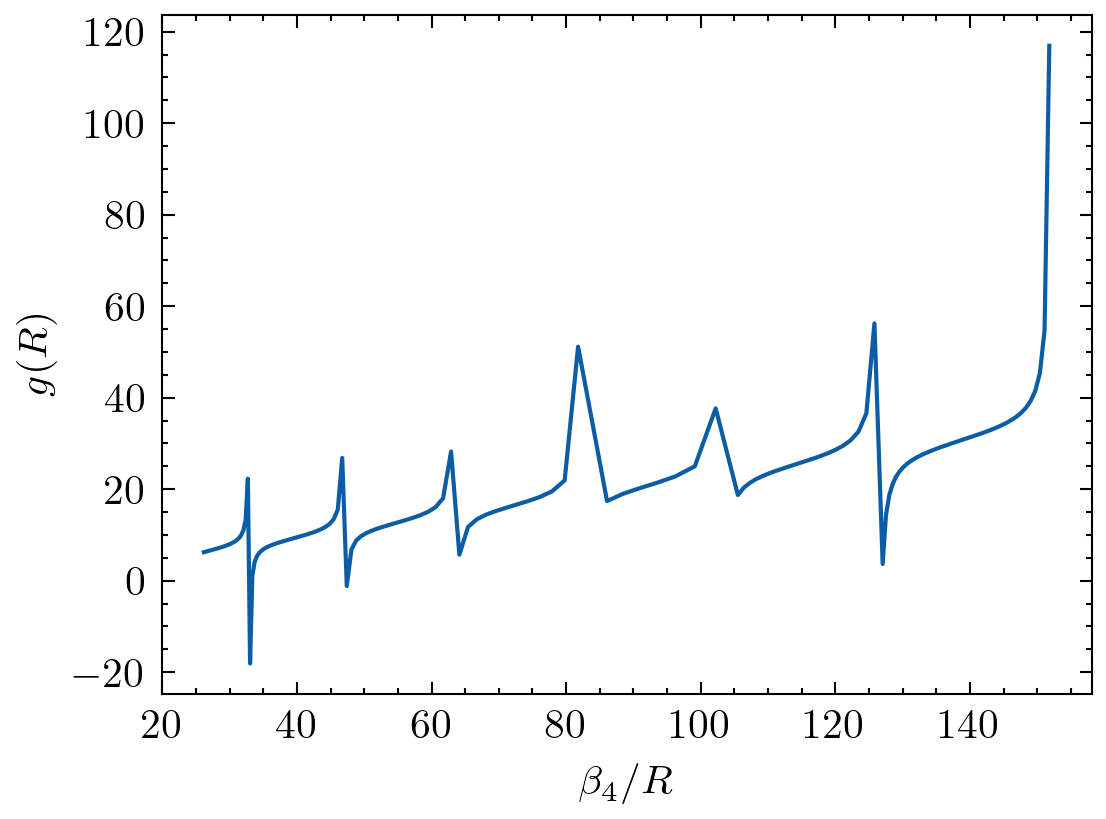

In [101]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/good_Rs, good_gs)

ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$g(R)$');

In [128]:
lc = np.array([
    0.065,
    0.044,
    0.028,
    0.015,
    0.006,
    0.001,
])[::-1]

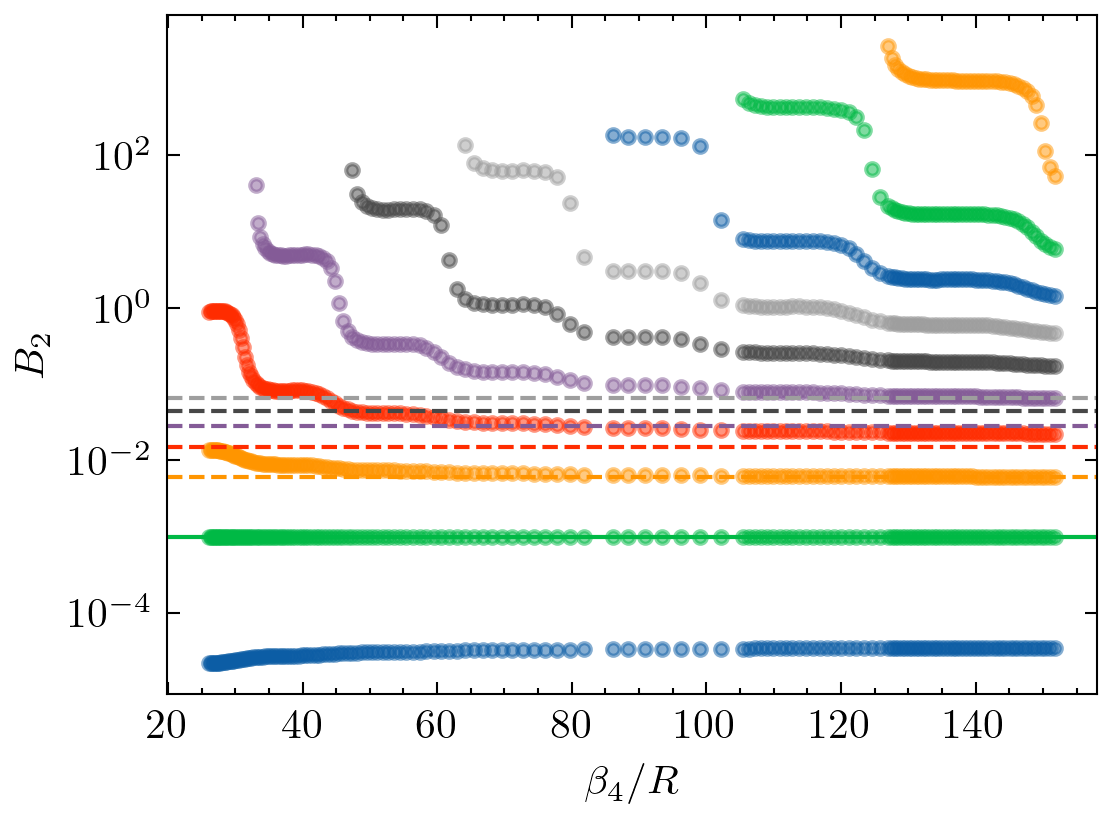

In [142]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

for (R, s) in zip(good_Rs, good_spectra):
    for (i, state) in enumerate(s):
        ax.scatter(const.BETA4/R, np.abs(state), color=f'C{i}', alpha=0.5, marker='.')

for (i, x) in enumerate(lc):
    ax.axhline(x, color=f'C{i+1}', linestyle='--' if i != 0 else '-')

ax.set_yscale('log')
ax.set_ylabel(r'$B_2$')
ax.set_xlabel(r'$\beta_4/R$');

In [132]:
def read_state(spec, n):
    if spec.size > n:
        return spec[n]
    else:
        return 0

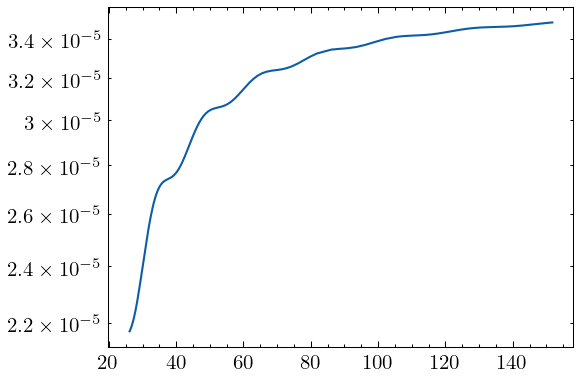

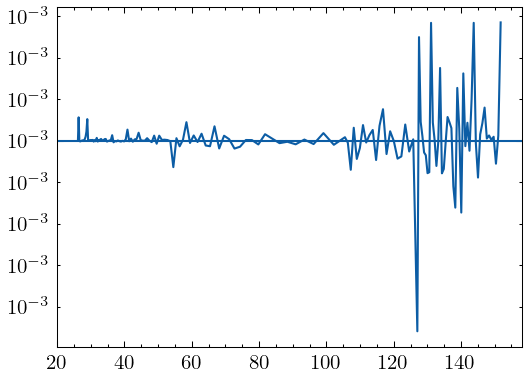

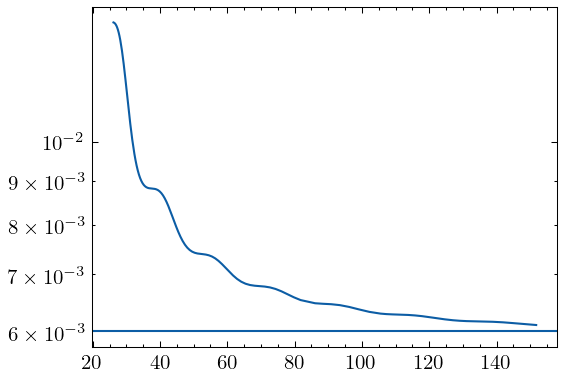

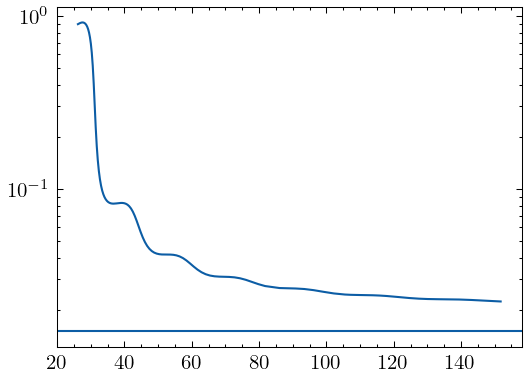

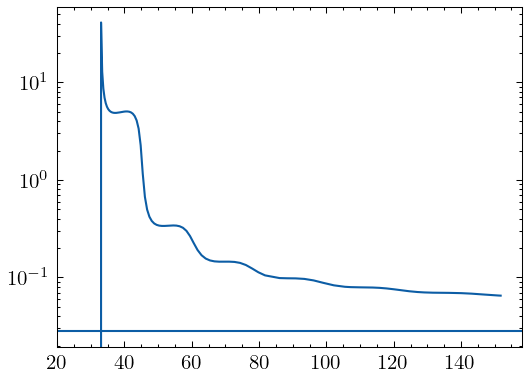

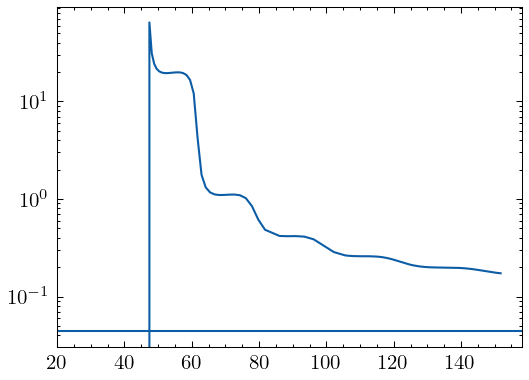

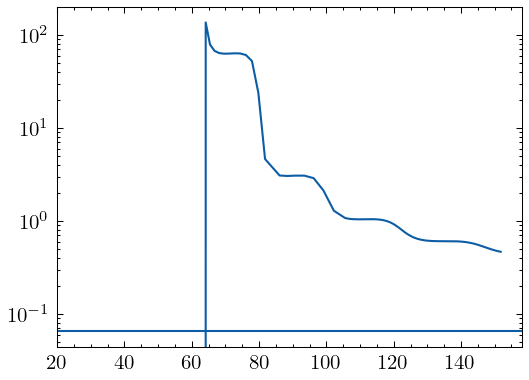

In [141]:
for i in range(7):
    state = np.array([read_state(s, i) for s in good_spectra])

    fig, ax = plt.subplots(figsize=(gr*h, h), dpi=150)
    fig.patch.set_facecolor('white')

    ax.plot(const.BETA4/good_Rs, np.abs(state))
    if i != 0:
        ax.axhline(lc[i-1])

    ax.set_yscale('log');

In [140]:
np.savetxt('nonlocal_rg_flow.txt', np.vstack((good_Rs, good_gs)).T)